# `Time Series Plotting`

# <font color=red>Mr Fugu Data Science</font>

# (◕‿◕✿)

# `Purpose & Outcome:`

+ Use Retail Online Sales to Plot Time Series
    + Manipulate and format date/time data
    + remove/clean data
+ Figure out how to format these data for plotting and what we want to visualize with matplotlib

[dataset uncleaned](https://archive.ics.uci.edu/ml/datasets/Online+Retail) | [further datasets for learning/practice](https://archive.ics.uci.edu/ml/index.php) | [Kaggle 80 plot for beginners](https://www.kaggle.com/python10pm/plotting-with-python-learn-80-plots-step-by-step)

In [1]:
# dataframe
import pandas as pd
# os: file locator, datetime: manipulate dates/times
import os,datetime
# Format & locate ticks for dates
from matplotlib.dates import DateFormatter, DayLocator
# general plot formatting
import matplotlib.pyplot as plt
#format plot x/y tick labels
from matplotlib.ticker import FuncFormatter

import numpy as np

%matplotlib inline 
#inline plots

In [2]:
# Find a file outside your directory:

def os_any_dir_search(file):
    u=[]
    for p,n,f in os.walk(os.getcwd()):
        
        for a in f:
            a = str(a)
            if a.endswith(file): # can be (.csv) or a file like I did and search 
#                 print(a)
#                 print(p)
                t=pd.read_csv(p+'/'+file)
                u.append(p+'/'+a)
    return t,u

In [3]:
retail_sales_cleaned = os_any_dir_search('SalesDataNoCancels.csv')[0]

retail_sales_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CanceledQty,Matches
0,563614,23345,DOLLY GIRL BEAKER,200,8/18/2011 8:51,1.08,12415,Australia,1,False
1,568708,23391,I LOVE LONDON MINI BACKPACK,4,9/28/2011 15:41,4.15,12393,Australia,1,False
2,556917,22418,10 COLOUR SPACEBOY PEN,48,6/15/2011 13:37,0.85,12415,Australia,1,False
3,543989,20973,12 PENCIL SMALL TUBE WOODLAND,384,2/15/2011 9:52,0.55,12415,Australia,1,False
4,547659,20984,12 PENCILS TALL TUBE POSY,12,3/24/2011 13:05,0.85,12434,Australia,1,False


# `Convert string dates to datetime for parsing:`

In [4]:
# Convert str to date/time with pandas
retail_sales_cleaned['InvoiceDate']=pd.to_datetime(retail_sales_cleaned['InvoiceDate'],
                    infer_datetime_format=True)

# Change formating to US dates
retail_sales_cleaned['Date']=retail_sales_cleaned['InvoiceDate'].dt.strftime('%m/%d/%Y')
# Extract the hours and minutes
retail_sales_cleaned['Time']=retail_sales_cleaned['InvoiceDate'].dt.strftime('%H:%M')
retail_sales_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CanceledQty,Matches,Date,Time
0,563614,23345,DOLLY GIRL BEAKER,200,2011-08-18 08:51:00,1.08,12415,Australia,1,False,08/18/2011,08:51
1,568708,23391,I LOVE LONDON MINI BACKPACK,4,2011-09-28 15:41:00,4.15,12393,Australia,1,False,09/28/2011,15:41
2,556917,22418,10 COLOUR SPACEBOY PEN,48,2011-06-15 13:37:00,0.85,12415,Australia,1,False,06/15/2011,13:37
3,543989,20973,12 PENCIL SMALL TUBE WOODLAND,384,2011-02-15 09:52:00,0.55,12415,Australia,1,False,02/15/2011,09:52
4,547659,20984,12 PENCILS TALL TUBE POSY,12,2011-03-24 13:05:00,0.85,12434,Australia,1,False,03/24/2011,13:05


In [5]:
# Day of week from numeric
retail_sales_cleaned['Day_of_Week']=retail_sales_cleaned['InvoiceDate'].dt.strftime('%A')
# Month name from numeric
retail_sales_cleaned['Month']=retail_sales_cleaned['InvoiceDate'].dt.strftime('%B')
# Sales Totals:
retail_sales_cleaned['Sales_Total']=\
retail_sales_cleaned['Quantity']*retail_sales_cleaned['UnitPrice']
retail_sales_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CanceledQty,Matches,Date,Time,Day_of_Week,Month,Sales_Total
0,563614,23345,DOLLY GIRL BEAKER,200,2011-08-18 08:51:00,1.08,12415,Australia,1,False,08/18/2011,08:51,Thursday,August,216.0
1,568708,23391,I LOVE LONDON MINI BACKPACK,4,2011-09-28 15:41:00,4.15,12393,Australia,1,False,09/28/2011,15:41,Wednesday,September,16.6
2,556917,22418,10 COLOUR SPACEBOY PEN,48,2011-06-15 13:37:00,0.85,12415,Australia,1,False,06/15/2011,13:37,Wednesday,June,40.8
3,543989,20973,12 PENCIL SMALL TUBE WOODLAND,384,2011-02-15 09:52:00,0.55,12415,Australia,1,False,02/15/2011,09:52,Tuesday,February,211.2
4,547659,20984,12 PENCILS TALL TUBE POSY,12,2011-03-24 13:05:00,0.85,12434,Australia,1,False,03/24/2011,13:05,Thursday,March,10.2


# `Clean Data & Format for Plotting:`

+ We have to check for Nan/None values for date/time
+ Also, very important: classifying day/month isn't enough. We need more clarification because when we plot this we will have gaps/steps which are not informative. 
    + Therefore, we shall break it down further so that we have more data points: 
    if we have Monday and Tuesday but nothing in between then there is a large gap in knowledge. Sales are done by the minute/hour and therefore we should try to break it down if we are to do a line or scatter plot.

In [6]:
# Checking for null values in all columns:
retail_sales_cleaned.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
CanceledQty    0
Matches        0
Date           0
Time           0
Day_of_Week    0
Month          0
Sales_Total    0
dtype: int64

In [7]:
# Sales VOLUME: (# of Purchases)

sales_by_month=retail_sales_cleaned.loc[:,['Sales_Total','Month']]

sales_by_month['Month'].value_counts() # number of purchases by month
# sales_by_month['Month'].unique()
# sales_by_month['Month'].value_counts()

November     62598
October      48088
December     42196
September    39108
May          27659
August       26463
June         26453
March        26369
July         26119
April        22097
January      20651
February     19454
Name: Month, dtype: int64

In [8]:
# Sales Totals/Month

ff=sales_by_month.groupby('Month').sum().unstack()['Sales_Total']
ff # monthly sales in British Pounds

Month
April         430497.691
August        625288.990
December      901412.940
February      439187.140
January       457864.050
July          582967.621
June          605578.550
March         572038.170
May           652485.670
November     1129105.540
October       967584.800
September     932438.782
dtype: float64

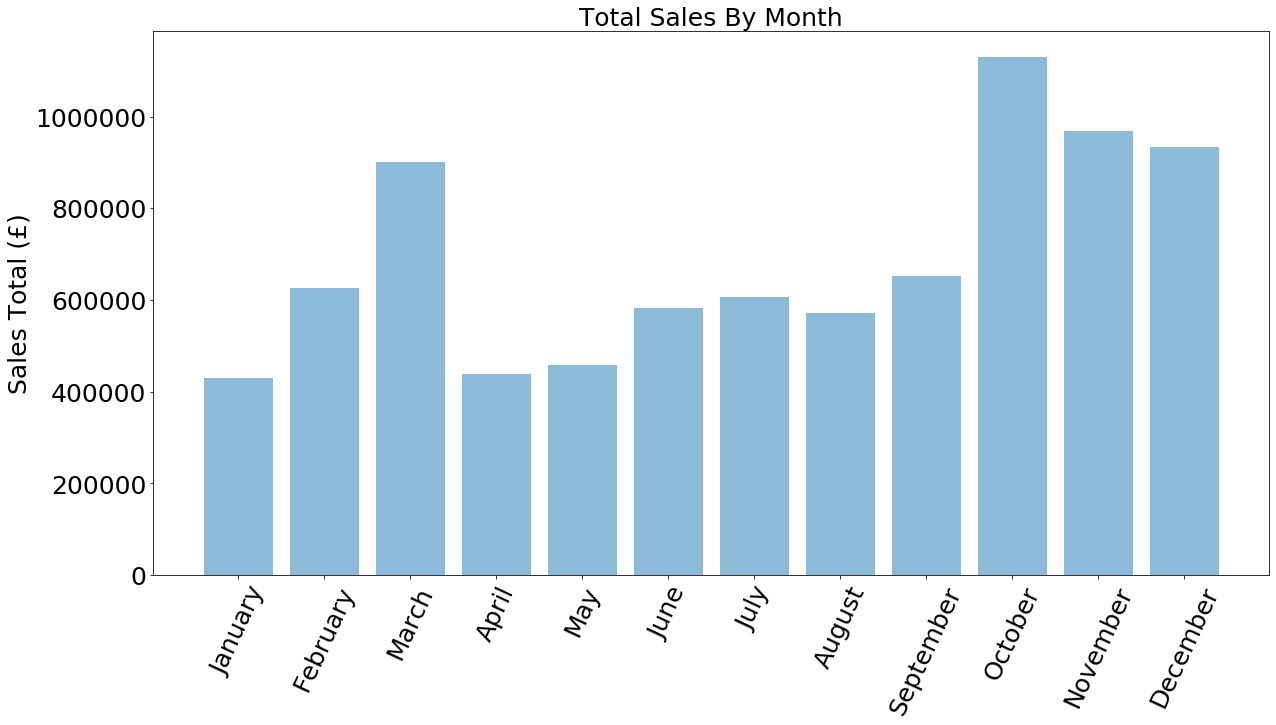

In [32]:
# RUN THIS CODE TWICE if: font sizes doesn't enlarge

# import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25) 

labels_=['January','February','March','April','May',
'June','July','August','September','October','November','December']

plt.bar(labels_,ff,
align='center', alpha=0.5)
plt.xticks(labels_,rotation=65)

plt.ylabel('Sales Total '+ '('+u'\u00A3'+')',size=25)
plt.title('Total Sales By Month',size=25)

plt.show()

In [10]:
new_row=[{'Day_of_Week':'Saturday','Sales_Total':0}]
df_=retail_sales_cleaned.loc[:,['Day_of_Week','Sales_Total']]

df_=df_.append(new_row, ignore_index=True)

days_sub_fix=df_.groupby('Day_of_Week').sum().unstack()['Sales_Total']
days_sub_fix

Day_of_Week
Friday       1228419.731
Monday       1293921.391
Saturday           0.000
Sunday        771588.771
Thursday     1919435.530
Tuesday      1547583.411
Wednesday    1535501.110
dtype: float64

In [11]:
# for some reason I had to do this in order to get correct order! 
label_days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

days_sub_fix[label_days]

Day_of_Week
Monday       1293921.391
Tuesday      1547583.411
Wednesday    1535501.110
Thursday     1919435.530
Friday       1228419.731
Saturday           0.000
Sunday        771588.771
dtype: float64

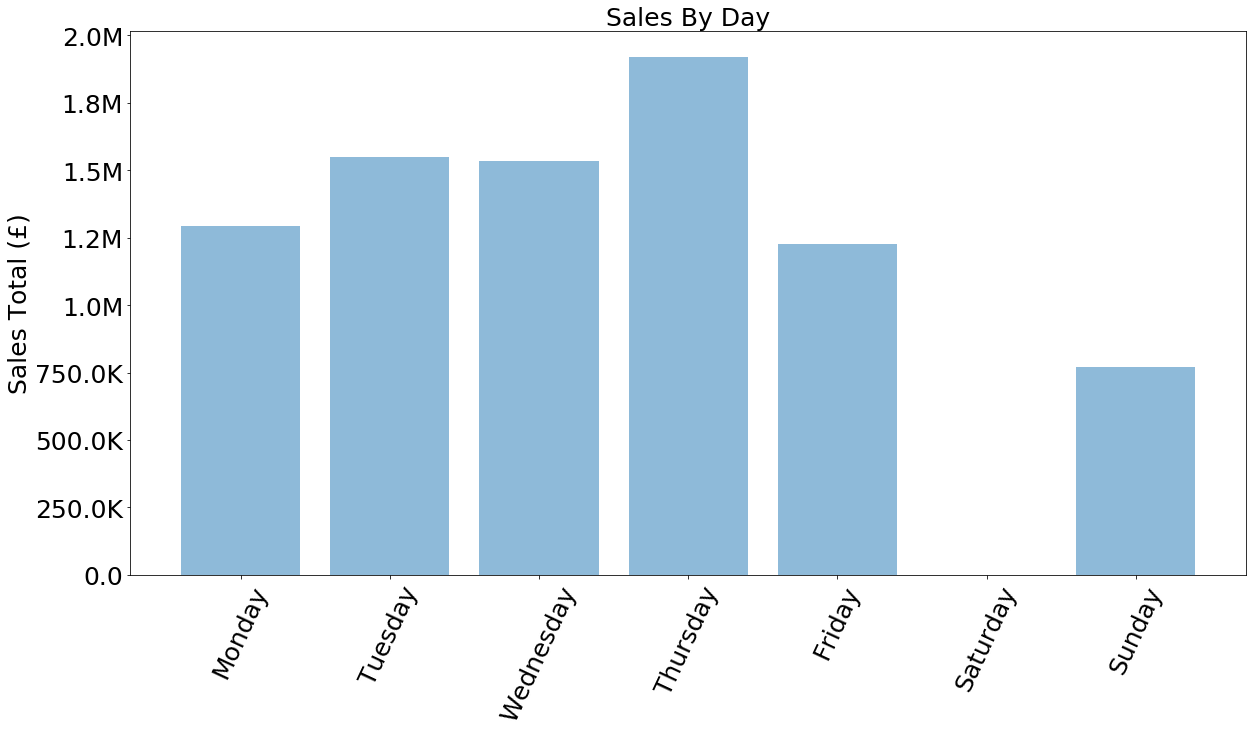

In [12]:
# from matplotlib.ticker import FuncFormatter #(used for label formatting)

fig,ax=plt.subplots(figsize=(20,10))

plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25) 

# Convert y-axis labels to decimal with magnitude 
def number_formatter(number, pos=None):
    """Convert a number into a human readable format."""
    magnitude = 0
    while abs(number) >= 1000:
        magnitude += 1
        number /= 1000.0
    return '%1.1f%s' % (number, ['', 'K', 'M', 'B', 'T', 'Q'][magnitude])


ax.yaxis.set_major_formatter(FuncFormatter(number_formatter))


ax.bar(label_days,days_sub_fix[label_days],align='center', alpha=0.5)
plt.xticks(label_days,rotation=65)
plt.ylabel('Sales Total '+ '('+u'\u00A3'+')',size=25)
plt.title('Sales By Day',size=25)
# plt.rc('xtick', labelsize=25) 
# plt.rc('ytick', labelsize=25) 


plt.show()


**`I want to show something if you look at the sales by month and day, they don't seem like the scale would match up. But, doing a comparison you will see they are  in fact aligned.`** 

+ For some reason there were no sales on Saturday, even though these data come from an actual website.

+ I changed the formatting of the y-axis labels (major ticks) pay attention

**`Side Note:`** `retail_sales_cleaned['Day_of_Week'].value_counts()` this returns the volume sold per day!

In [13]:
# daily sales by volume
retail_sales_cleaned['Day_of_Week'].value_counts()

Thursday     78113
Wednesday    67111
Tuesday      64841
Monday       63230
Sunday       60608
Friday       53352
Name: Day_of_Week, dtype: int64

# `Time Series Investigating Top 5 Items and Countries`

+ `Two plots:`
    + One plot will be top 5 countries by Sales daily
    + Other plot will be top 5 items sold by month
    
**`UK sales dwarf data so I am removing from Top 5!`**

In [14]:
# We need to subset the data first:

subset_by_country_sales=retail_sales_cleaned.loc[:,['Country','Sales_Total']]


countries_subset=subset_by_country_sales.groupby('Country').\
sum().sort_values(by='Sales_Total',ascending=False)

countries_subset[1:6] # These are the countries we will map/plot removing UK

,Sales_Total
Country,
Netherlands,283643.94
EIRE,237641.81
Germany,222920.88
France,203959.46
Australia,136919.90


In [15]:
# By the way UK, actually dwarfs this dataset, but we will NOT use here 

countries_subset[:5]['Sales_Total'] # Top 5 countries by sales

Country
United Kingdom    6.765359e+06
Netherlands       2.836439e+05
EIRE              2.376418e+05
Germany           2.229209e+05
France            2.039595e+05
Name: Sales_Total, dtype: float64

In [16]:
# Now Find Data based on our list of countries

idx=countries_subset[1:6]['Sales_Total'].index # Get country names Top 5 w/o UK

top_five_countries_full=retail_sales_cleaned.\
loc[retail_sales_cleaned['Country'].isin(idx)]

# verify we did it correct
retail_sales_cleaned.loc[retail_sales_cleaned['Country'].isin(idx)].Country.unique()

array(['Australia', 'EIRE', 'France', 'Germany', 'Netherlands'],
      dtype=object)

In [17]:
# Prepare data for columns we need

subset_top_five=top_five_countries_full.loc[:,['Country','Sales_Total','Date','Month']]
subset_top_five.head()

,Country,Sales_Total,Date,Month
0,Australia,216.0,08/18/2011,August
1,Australia,16.6,09/28/2011,September
2,Australia,40.8,06/15/2011,June
3,Australia,211.2,02/15/2011,February
4,Australia,10.2,03/24/2011,March


In [18]:
# Subset Data Based on Holiday Season
bb=retail_sales_cleaned.sort_values('Date')
bb=bb[bb.InvoiceDate.between('10/01/2011', '10/31/2011')]
vv=bb.loc[:,['Date','Country','Month','Sales_Total']]

# Take Top 5 countries and exclude UK
idx_=countries_subset[1:6]['Sales_Total'].index
nn=vv.loc[vv['Country'].isin(idx_)]


In [19]:
# Not All Countries Started Purchasing on same days: Need to standardize
oct_dts=pd.date_range(start="10/01/2011",end="10/31/2011").strftime("%m/%d/%Y")

vb=[]
for i in idx_:
    kk=nn.loc[nn['Country']==i]
    
# find country where date is not in comparison list and append 0, country name, date
    vb.append([[i]*len(set(oct_dts)-set(kk['Date'])),
               list(set(oct_dts)-set(kk['Date'])),
               [0]*len(set(oct_dts)-set(kk['Date']))])

dd_=pd.DataFrame(vb,columns=['Country','Date','Sales_Total'])

dd_=dd_.apply(pd.Series.explode)# flatten dataframe columns of lists of dictionaries

updated_dates=nn.loc[:,['Date','Country','Sales_Total']].append(dd_).\
reset_index(drop=True)


# `Iterate Through Each Country & Stores Sales By Date`

In [20]:
store_=[]
ppp=updated_dates.sort_values(by=['Country','Date'])

names_=ppp['Country'].unique()
for i in names_:
    mm=ppp.loc[ppp['Country']==i]
    store_.append(list(mm.groupby('Date').sum()['Sales_Total']))

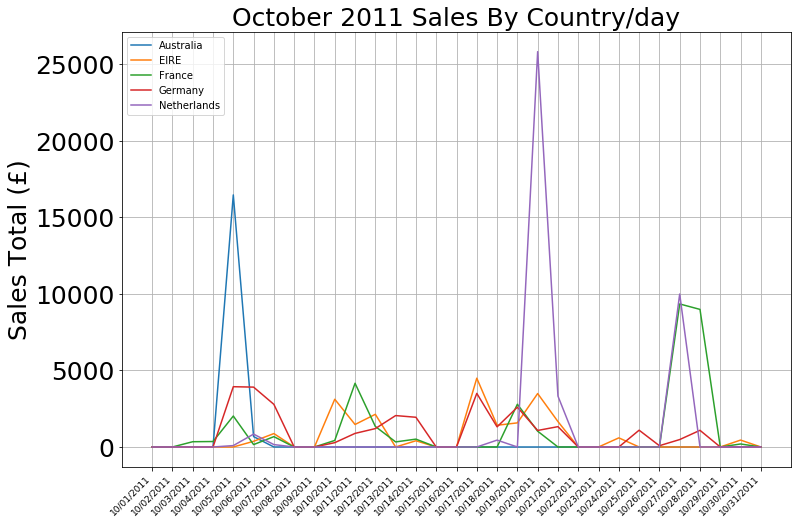

In [21]:
# import matplotlib.pyplot as plt

grid=[x for x in ppp.loc[:,'Date'].unique()]
graphs=store_
plt.figure(figsize=(12,8))
for gg,graph in enumerate(graphs):
        plt.plot(grid,graph,label=ppp.loc[:,'Country'].unique()[gg])
                
plt.ylabel('Sales Total '+ '('+u'\u00A3'+')',size=25)
plt.title('October 2011 Sales By Country/day',size=25)
plt.legend(loc="upper left")
plt.xticks(ppp.loc[:,'Date'].unique(),rotation=45,ha="right",size=9)
plt.grid(True)
plt.show()

# `How About Plotting a single day based on hourly data for UK sales`

+ We need to further subset our data

In [22]:
uk_=retail_sales_cleaned[retail_sales_cleaned['Country']=='United Kingdom']
uk_holiday=uk_[uk_.InvoiceDate.between('10/01/2011', '10/31/2011')]

# Use orders on 10/05/2011 and sort rows by Invoice date because of time attribute
uk_sorted_hol=uk_holiday[uk_holiday['Date']=='10/05/2011'].sort_values('InvoiceDate')
uk_sorted_hol.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CanceledQty,Matches,Date,Time,Day_of_Week,Month,Sales_Total
127255,569555,22424,ENAMEL BREAD BIN CREAM,1,2011-10-05 08:17:00,12.75,17728,United Kingdom,1,False,10/05/2011,08:17,Wednesday,October,12.75
243033,569555,22086,PAPER CHAIN KIT 50'S CHRISTMAS,6,2011-10-05 08:17:00,2.95,17728,United Kingdom,1,False,10/05/2011,08:17,Wednesday,October,17.70
158050,569555,22865,HAND WARMER OWL DESIGN,12,2011-10-05 08:17:00,2.10,17728,United Kingdom,1,False,10/05/2011,08:17,Wednesday,October,25.20
71152,569555,23247,BISCUIT TIN 50'S CHRISTMAS,6,2011-10-05 08:17:00,2.89,17728,United Kingdom,1,False,10/05/2011,08:17,Wednesday,October,17.34
112546,569555,23330,DECORATIVE WICKER HEART MEDIUM,12,2011-10-05 08:17:00,1.25,17728,United Kingdom,1,False,10/05/2011,08:17,Wednesday,October,15.00


In [23]:
# Now we need to get by hour: (more date/time formatting)
uk_sorted_hol['Hour']=uk_sorted_hol['InvoiceDate'].dt.strftime('%H')
uk_sorted_hol.head()

# Now we need to standardize 24 hours of day, since orders are NOT 24hrs

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CanceledQty,Matches,Date,Time,Day_of_Week,Month,Sales_Total,Hour
127255,569555,22424,ENAMEL BREAD BIN CREAM,1,2011-10-05 08:17:00,12.75,17728,United Kingdom,1,False,10/05/2011,08:17,Wednesday,October,12.75,08
243033,569555,22086,PAPER CHAIN KIT 50'S CHRISTMAS,6,2011-10-05 08:17:00,2.95,17728,United Kingdom,1,False,10/05/2011,08:17,Wednesday,October,17.70,08
158050,569555,22865,HAND WARMER OWL DESIGN,12,2011-10-05 08:17:00,2.10,17728,United Kingdom,1,False,10/05/2011,08:17,Wednesday,October,25.20,08
71152,569555,23247,BISCUIT TIN 50'S CHRISTMAS,6,2011-10-05 08:17:00,2.89,17728,United Kingdom,1,False,10/05/2011,08:17,Wednesday,October,17.34,08
112546,569555,23330,DECORATIVE WICKER HEART MEDIUM,12,2011-10-05 08:17:00,1.25,17728,United Kingdom,1,False,10/05/2011,08:17,Wednesday,October,15.00,08


In [24]:
# format hours for interpretation with pandas later
vb_=[]
hrs_day=range(1,25)
for i in  hrs_day:
    if i <10:
        vb_.append('0'+str(i))
    else:
        vb_.append(str(i))

# find unique hrs that were not in original DF
unused_hrs=list(set(vb_)-set(uk_sorted_hol['Hour'].unique())) #uk_sub

hr_={'Hour':unused_hrs}
sales_={'Sales_Total':list([0]*len(unused_hrs))}

# append updated Hr data to end of dataframe
uk_sub_fin=uk_sorted_hol.append(pd.concat([pd.DataFrame(hr_),
pd.DataFrame(sales_)],axis=1)) 


uk_sub_fin=uk_sub_fin.sort_values('Hour') # sort by Hr

In [25]:
# This is the sales by hour summed:

# list(uk_sub_fin.groupby('Hour').sum()['Sales_Total'])

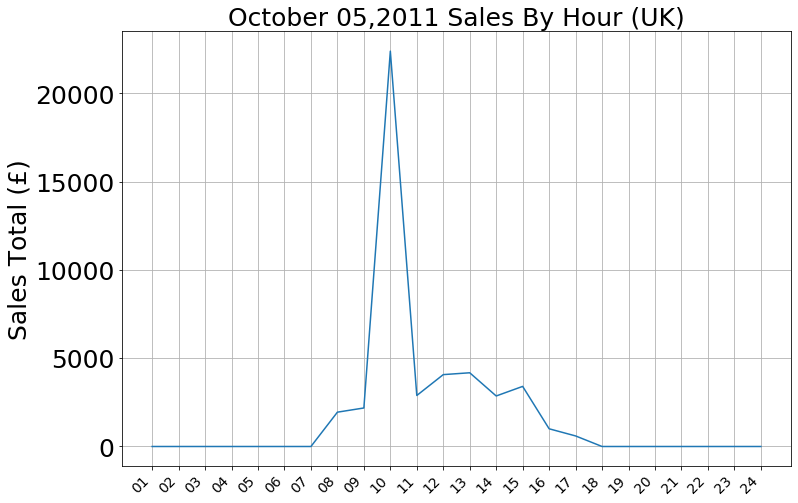

In [26]:
plt.figure(figsize=(12,8))
plt.plot(uk_sub_fin['Hour'].unique(),
list(uk_sub_fin.groupby('Hour').sum()['Sales_Total']))
                
plt.ylabel('Sales Total '+ '('+u'\u00A3'+')',size=25)
plt.title('October 05,2011 Sales By Hour (UK)',size=25)
# plt.legend(loc="upper left")
plt.xticks(uk_sub_fin['Hour'].unique(),rotation=45,ha="right",size=14)
plt.grid(True)
plt.show()

# `Last Plot: 3 Days UK: hour vs Sales_Totals`

In [27]:
# subset and use UK data
uk_=retail_sales_cleaned[retail_sales_cleaned['Country']=='United Kingdom']
# get range of dates of interest
uk_holiday_threeDay=uk_[uk_.InvoiceDate.between('10/04/2011', '10/07/2011')]
# make new column by hour
uk_holiday_threeDay['Hour']=uk_holiday_threeDay['InvoiceDate'].dt.strftime('%H')

# subset data and sort so dates are in order 
uk_three_day=uk_holiday_threeDay.\
loc[:,['Hour','Sales_Total','InvoiceDate','Date']].sort_values('InvoiceDate')

/Users/zatoichi59/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
three_days=uk_three_day['Date'].unique() # unique dates (oct. 4-6 2011)

three_day_by_hrs=[]

for i in three_days:
    mm_=uk_three_day.loc[uk_three_day['Date']==i] # iterate by date
    three_day_by_hrs.append(list(mm_['Hour'].unique())) # store unique hours

set_diff=[]
for i in three_day_by_hrs:
    set_diff.append(sorted(list(set(vb_)-set(i)))) # get hours not found in DF

# New Hrs Not in Original DF
three_day_hrs_=pd.DataFrame({'Hour':set_diff})

xx_exp=three_day_hrs_.apply(pd.Series.explode).reset_index(drop=True) #flatten rows

# Create enough rows to match new DF
three_day_Sales=pd.DataFrame({'Sales_Total':[0]*len(xx_exp)})


In [29]:
# Ds.extend() generates correct length of each date so DF rows match
Ds=[]
for i in three_days:
    mm_=uk_three_day.loc[uk_three_day['Date']==i]
    Ds.extend([mm_['Date'].unique()]*len((set(vb_)-set(list(mm_['Hour'].unique())))))

# preparing new DF:
mvc=pd.DataFrame({'Date':Ds})
omg=mvc.apply(pd.Series.explode).reset_index(drop=True) #flatten lists of dates

fif=pd.concat([xx_exp,three_day_Sales,omg],axis=1)
upd=uk_three_day.loc[:,['Hour','Sales_Total','Date']]

uu=upd.append(fif).reset_index(drop=True)
uu=uu.sort_values(['Hour','Date'])


In [30]:
# Sales By Hr stored in lists:
store_inf=[]
p_=uu.sort_values(by=['Hour','Date'])

names_=uu['Date'].unique()
for i in names_:
    mm=p_.loc[p_['Date']==i]
    store_inf.append(list(mm.groupby('Hour').sum()['Sales_Total']))

store_inf[0] # first entry 10/04/2011 by hr sales_totals

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2735.0399999999986,
 7715.749999999995,
 3034.3799999999987,
 4000.8899999999994,
 5705.219999999996,
 7946.72,
 3053.840000000005,
 2606.6600000000008,
 128.62999999999997,
 8.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

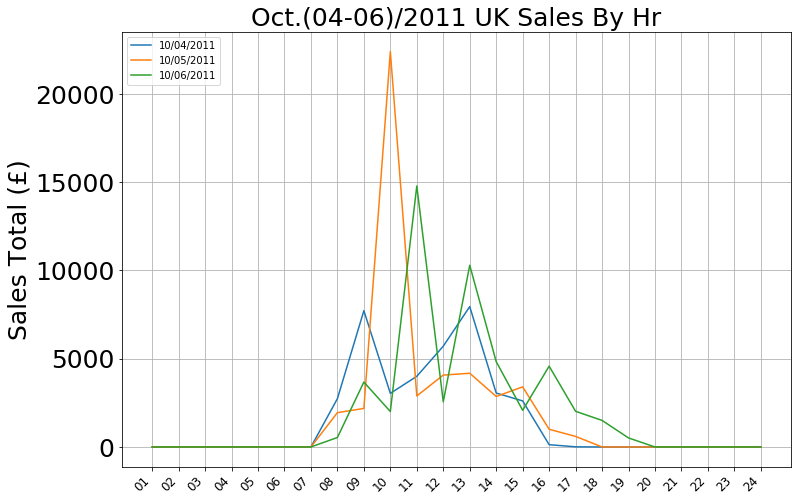

In [31]:

grid_=[x for x in p_.loc[:,'Hour'].unique()]
graphs_=store_inf
plt.figure(figsize=(12,8))
for gg,graph in enumerate(graphs_):
        plt.plot(grid_,graph,label=p_.loc[:,'Date'].unique()[gg])
                
plt.ylabel('Sales Total '+ '('+u'\u00A3'+')',size=25)
plt.title('Oct.(04-06)/2011 UK Sales By Hr',size=25)
plt.legend(loc="upper left")
plt.xticks(p_.loc[:,'Hour'].unique(),rotation=45,ha="right",size=12)
plt.grid(True)
plt.show()

# <font color=red>Like</font>, Share & 

# <font color=red>SUB</font>scribe

**`Help Support the channel: Buy Me A Coffee @mrfugudatsci`**

# `Citations & Help:`

# ◔̯◔

https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values

`Date Time Help`

https://www.datacamp.com/community/tutorials/converting-strings-datetime-objects

https://stackoverflow.com/questions/38067704/how-to-change-the-datetime-format-in-pandas

https://stackoverflow.com/questions/38709558/how-to-format-a-date-column-in-pandas

`Sales Data Analysis Ideas:`

https://www.kaggle.com/fabiendaniel/customer-segmentation

https://www.kaggle.com/carrie1/ecommerce-data/notebooks

`Plotting Help:`

https://machinelearningmastery.com/time-series-data-visualization-with-python/

https://unidata.github.io/python-training/workshop/Time_Series/basic-time-series-plotting/

https://dfrieds.com/data-visualizations/how-format-large-tick-values.html

https://napsterinblue.github.io/notes/python/viz/tick_string_formatting/

https://flynn.gg/blog/better-matplotlib-charts/

https://www.python-course.eu/matplotlib_histograms.php

`Viewer Motivation:`

https://stackoverflow.com/questions/45177318/in-pandas-is-there-some-compact-way-to-plot-data-across-days-of-the-week

`Times Series Plots`

https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/customize-dates-matplotlib-plots-python/

https://goodboychan.github.io/chans_jupyter/python/datacamp/time_series_analysis/visualization/2020/06/13/02-Work-with-Multiple-Time-Series.html

https://stackoverflow.com/questions/40766909/suggestions-to-plot-overlapping-lines-in-matplotlib

`E-Commerce Help/Example Code:`

https://www.kaggle.com/carrie1/ecommerce-data/notebooks